In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
import pandas as pd

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 3.4661629670697414

p-value: 0.00026397158691493505

p-value is smaller than the level of significance, so we have to reject the null hypothesis


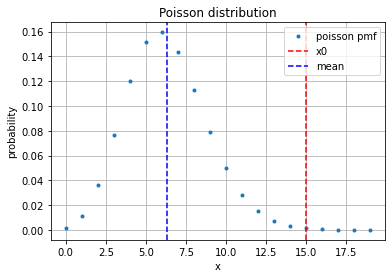

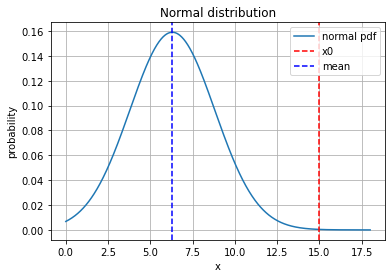

In [56]:
# initial parameters
# we approximate a poisson distribution considering
# a gaussian one with mu = sigma and looking only to
# the right tail
x0 = 15.
mu = 6.3
sigma_mu = np.sqrt(mu) # poisson distribution 
alpha = 0.022 # level of significance

# Z-score
Z = abs(x0 - mu) / sigma_mu
print('Z =', Z)

# calculate the p-value as the sum of the right tail
pvalue = 1 - stats.norm.cdf(Z)
print('\np-value:', pvalue)

# results
if (pvalue < alpha):
    print('\np-value is smaller than the level of significance, so we have to reject the null hypothesis')
else:
    print('\np-value is bigger than the level of significance, so the null hypothesis id valid')
    
# poisson distribution 
x = np.arange(0, 20)
y = stats.poisson.pmf(x, mu=mu)

# plot of poisson distribution
plt.plot(x, y, marker='.', linestyle='none')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='blue')
plt.ylabel("probability")
plt.xlabel("x")
plt.legend(['poisson pmf', 'x0', 'mean'])
plt.title('Poisson distribution')
plt.grid()
plt.show()

# plot using normal distribution
x = np.linspace(0,18, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma_mu)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('probability')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='blue')
plt.legend(['normal pdf', 'x0', 'mean'])
plt.title('Normal distribution')
plt.grid()
plt.show()

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = 3.786997938137629

p-value =  0.004302464132864604

Of course, the maximum significance level at which we can accept the null hypothesis correspond to the p-value.


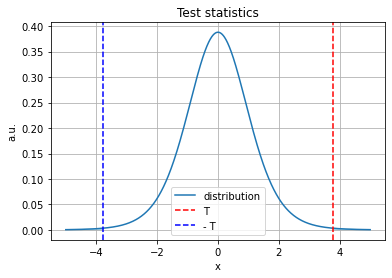

In [36]:
# initial parameters
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre)

sigma1 = np.sqrt(np.var(pre, ddof=1))
sigma2 = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((sigma1**2 + sigma2**2)/2)

mean1 = np.mean(pre)
mean2 = np.mean(post)
T = np.abs(mean1 - mean2) / (sigma * np.sqrt(2 / n))
print('T =', T)

# double tailed
pvalue = stats.t.cdf(-T, n-1) + (1. -stats.t.cdf(T, n-1))
print('\np-value = ', pvalue)

# result
print('\nOf course, the maximum significance level at which we can accept the null hypothesis correspond to the p-value.')

# plot the statistics and its pdf
xs = np.linspace(-5, 5, 1000)
ts = stats.t.pdf(xs, n-1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=abs(xs) > abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='red')
plt.axvline(-T, linestyle='--', color='blue')
plt.xlabel('x')
plt.ylabel('a.u.')
plt.title('Test statistics')
plt.grid()
plt.legend(['distribution', 'T', '- T'])

plt.show()

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Maxs:
A = 10.58 +- 0.41
w = 0.59 +- 0.02
phi = 10.16 +- 0.15
d = 27.95 +- 0.43

Mins:
A = 25.15 +- 1.31
w = 0.60 +- 0.02
phi = 9.85 +- 0.16
d = -36.71 +- 1.19

We have obtained resonable fits.
We can notice that the two periodic function have similar values of w and phi (amplitude
and time offset), but quite different values of A and d (amplitude and offset).


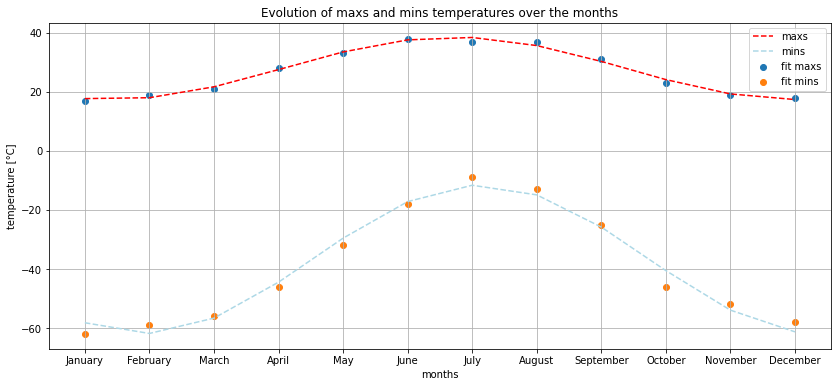

In [37]:
# initial parameters
maxs = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
mins = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
x_data = np.linspace(1,12,12)
months = np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# fitting function
def f(x, A, w, phi, d):
    return A * np.sin(w * x + phi) + d # sin function with amplitude and angular frequency

# fit maxs
popt1, pcov1 = optimize.curve_fit(f, x_data, maxs, p0=[10, 1, 6, 6], full_output=False)
print('Maxs:')
print('A = %.2f +- %.2f' % (popt1[0], np.sqrt(pcov1[0,0])))
print('w = %.2f +- %.2f' % (popt1[1], np.sqrt(pcov1[1,1])))
print('phi = %.2f +- %.2f' % (popt1[2], np.sqrt(pcov1[2,2])))
print('d = %.2f +- %.2f\n' % (popt1[3], np.sqrt(pcov1[3,3])))

# fit mins
popt2, pcov2 = optimize.curve_fit(f, x_data, mins, p0=[20, 1, 6, 6], full_output=False)
print('Mins:')
print('A = %.2f +- %.2f' % (popt2[0], np.sqrt(pcov2[0,0])))
print('w = %.2f +- %.2f' % (popt2[1], np.sqrt(pcov2[1,1])))
print('phi = %.2f +- %.2f' % (popt2[2], np.sqrt(pcov2[2,2])))
print('d = %.2f +- %.2f\n' % (popt2[3], np.sqrt(pcov2[3,3])))

# plots
fig, ax = plt.subplots(1, 1, figsize=(14,6))
ax.scatter(months, maxs)
ax.scatter(months, mins)
ax.set_xlabel('months')
ax.set_ylabel('temperature [°C]')
ax.set_title('Evolution of maxs and mins temperatures over the months')
ax.grid()

# fit maxs and mins plot
ax.plot(months, f(x_data, popt1[0], popt1[1], popt1[2], popt1[3]), linestyle='--', color='red')
ax.plot(months, f(x_data, popt2[0], popt2[1], popt2[2], popt2[3]), linestyle='--', color='lightblue')
ax.legend(['maxs', 'mins', 'fit maxs', 'fit mins'])

# comment
print('We have obtained resonable fits.')
print('We can notice that the two periodic function have similar values of w and phi (amplitude')
print('and time offset), but quite different values of A and d (amplitude and offset).')

plt.show()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

In [38]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2023-12-23 09:38:28--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com... 162.125.69.18
Connecting to www.dropbox.com|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2023-12-23 09:38:29--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc73e81bbb3824010ae37e36d3a6.dl.dropboxusercontent.com/cd/0/inline/CJ8_sljaMH1xGqgSr-xk9PCdu75lYqSkvMvJXCxqXdbSog33JZl0_i7vKdRZP15dMPhUIHHegqlxj3Ip1Tw9Y7OXtlCA1Q56kieLhY7M_gORAhJJKfZo1emM7w2wfy5pbDE/file# [following]
--2023-12-23 09:38:29--  https://uc73e81bbb3824010ae37e36d3a6.dl.dropboxusercontent.com/cd/0/inline/CJ8_sljaMH1xGqgSr-xk9PCdu75lYqSkvMvJXCxqXdbSog33JZl0_i7vKdRZP15dMPhUIHHegqlxj3Ip1Tw9Y7OXtlCA1Q56kieLhY7M_gORAhJJKfZo1emM7w2wfy5pbDE/file
Resolving uc73e81bbb3824010ae37e3

In [39]:
file = 'data/residuals_261.pkl'
df = pd.DataFrame(np.load(file,allow_pickle=True).item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


Fit parameters:

a = 1477.023 +- 36.287
mu = -0.084 +- 0.006
sigma = 0.223 +- 0.006


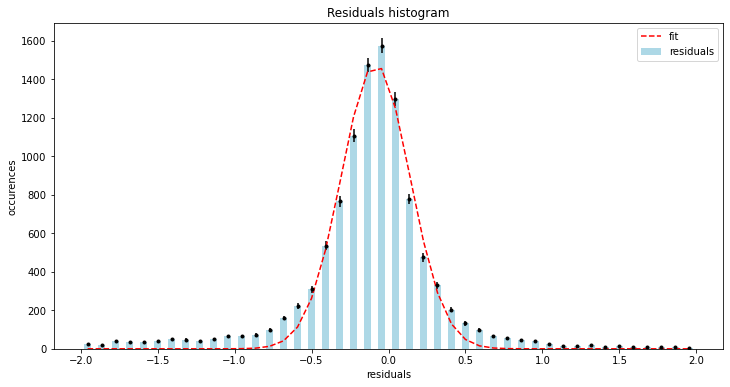

In [40]:
residuals = df['residuals']
binNumber = int(2*(len(residuals)**(1/3)))

# histogram
fig, ax = plt.subplots(1, 1, figsize=(12 ,6))
n, bins, value = ax.hist(residuals, bins=binNumber, range=[-2, 2], color='lightblue', rwidth=0.5)
ax.set_xlabel('residuals')
ax.set_ylabel('occurences')
ax.set_title('Residuals histogram')

# uncertainty
sigma = np.sqrt(n)
x_data = [(bins[i]+bins[i+1])/2 for i in range(len(bins) - 1)]
ax.errorbar(x_data, n, yerr=sigma, fmt='.k')

# fitting function
def gaussian_f(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

# fit
popt, pcov = optimize.curve_fit(gaussian_f, x_data, n, p0=[550, -0.2, 1], full_output=False)
ax.plot(x_data, gaussian_f(x_data, popt[0], popt[1], popt[2]), linestyle='--', color='red')
ax.legend(['fit', 'residuals'])
print("Fit parameters:\n")
print("a = %.3f +- %.3f" %(popt[0], np.sqrt(pcov[0,0])))
print("mu = %.3f +- %.3f" %(popt[1], np.sqrt(pcov[1,1])))
print("sigma = %.3f +- %.3f" %(popt[2], np.sqrt(pcov[2,2])))

plt.show()

In [44]:
# chi2 goodness-of-fit test
f = gaussian_f(x_data, popt[0], popt[1], popt[2])
ndof = len(x_data) - 1
chi2 = np.sum(((n - f)**2) / n**2)
pvalue = 1. - stats.chi2.cdf(chi2, ndof)

print('chi2 =', chi2)
print('\np-value =', pvalue)
print('\nThe p-value is close to 1, so we can say that the fit is satisfactory.')

chi2 = 30.637741244140106

p-value = 0.921300746185738

The p-value is close to 1, so we can say that the fit is satisfactory.


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [57]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

--2023-12-23 10:28:37--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com... 162.125.69.18
Connecting to www.dropbox.com|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-12-23 10:28:38--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc266ca4c879c6e0865be5754a3e.dl.dropboxusercontent.com/cd/0/inline/CJ-hcCDhfcEYIMroi65aNo0kFloqTK7mP3WH-1JtWO8baZ0MeKW2gKovwsH7zW9r-iH5G0xoyl9PS-1UUcND5cZJ5Tz5s8pXOntY8r8L_YIWgHeiMBfJq5dvi9KIaZ7GwzU/file# [following]
--2023-12-23 10:28:38--  https://uc266ca4c879c6e0865be5754a3e.dl.dropboxusercontent.com/cd/0/inline/CJ-hcCDhfcEYIMroi65aNo0kFloqTK7mP3WH-1JtWO8baZ0MeKW2gKovwsH7zW9r-iH5G0xoyl9PS-1UUcND5c

Fit parameters:
	a = -9.986 +- 0.180
	b = 12.335 +- 0.018
	c = 9.391 +- 0.127

Overall average temperature: 9.384097733019743 °C
Coldest temperature: -0.5952594395072879 °C
Hottest temperature: 19.3770766591819 °C

The 'b' parameter tells us how the cosine function oscillates over the time, so
it basically describes the periodic behaviour of the temperatures during the years.


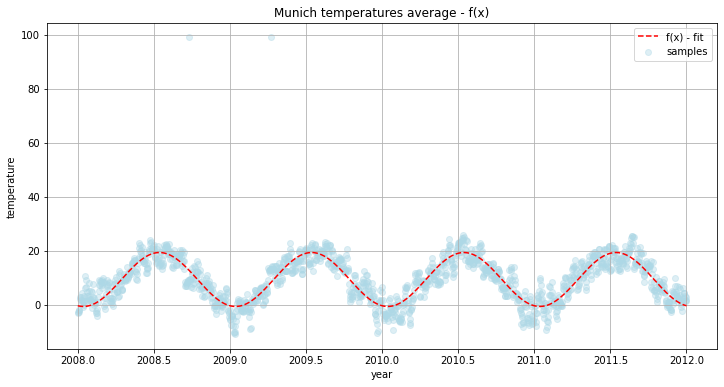

OPTIONAL: g(x)

Fit parameters:
	a = -9.983 +- 0.181
	b = 1.001 +- 0.003
	c = 3.908 +- 32.155
	d = 9.397 +- 0.129

Overall average temperature: 9.384097772215489 °C
Coldest temperature: -0.5862230025972828 °C
Hottest temperature: 19.380656699209915 °C

RSS of f(x): 34343.394833304046
RSS of g(x): 34341.88589495346

p-value of fisher F-test: 0.800221984178402
This tells us that the additional parameters is not so useful of our case.


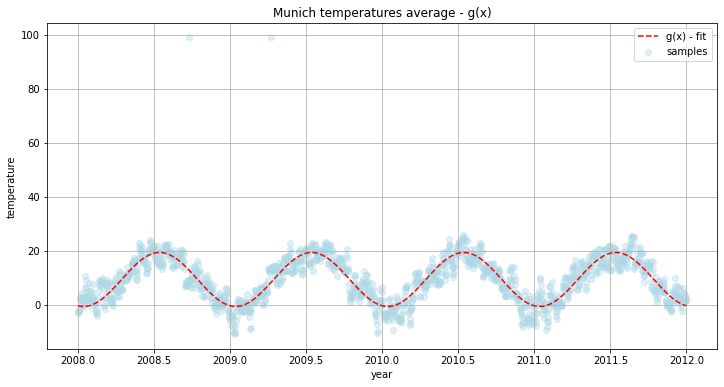

In [151]:
file = 'munich_temperatures_average_with_bad_data.txt'
df = pd.read_table(open(file), sep=' ', names=['days', 'temp'])
df = df[(df['days']>2008) & (df['days']<2012)]
temp = df['temp']
t = df['days']

# plots
fig, ax = plt.subplots(1, 1, figsize=[12,6])
t = np.linspace(2008, 2012, len(temp))
ax.scatter(t, temp, alpha=0.4, color='lightblue')
ax.set_xlabel('year')
ax.set_ylabel('temperature')
ax.set_title('Munich temperatures average - f(x)')

# fitting function f(x)
def f(t, a, b, c):
    return a * np.cos(2*np.pi*t + b) + c

# fit
popt, pcov = optimize.curve_fit(f, t, temp, full_output=False)
print('Fit parameters:')
print('\ta = %.3f +- %.3f' %(popt[0], np.sqrt(pcov[0,0])))
print('\tb = %.3f +- %.3f' %(popt[1], np.sqrt(pcov[1,1])))
print('\tc = %.3f +- %.3f' %(popt[2], np.sqrt(pcov[2,2])))
ax.plot(t, f(t, popt[0], popt[1], popt[2]), linestyle='--', color='red')
ax.legend(['f(x) - fit', 'samples'])
ax.grid()

#results
fit1 = f(t, popt[0], popt[1], popt[2])
print('\nOverall average temperature:', np.mean(fit1), '°C')
print('Coldest temperature:', np.min(fit1), '°C')
print('Hottest temperature:', np.max(fit1), '°C')
print('\nThe \'b\' parameter tells us how the cosine function oscillates over the time, so')
print('it basically describes the periodic behaviour of the temperatures during the years.')

plt.show()


### OPTIONAL ###


# plots
fig, ax = plt.subplots(1, 1, figsize=[12,6])
t = np.linspace(2008, 2012, len(temp))
ax.scatter(t, temp, alpha=0.4, color='lightblue')
ax.set_xlabel('year')
ax.set_ylabel('temperature')
ax.set_title('Munich temperatures average - g(x)')

# fitting function g(x)
def g(t, a, b, c, d):
    return a * np.cos(2*np.pi*b*t + c) + d

# fit
popt, pcov = optimize.curve_fit(g, t, temp, full_output=False)
print('OPTIONAL: g(x)\n')
print('Fit parameters:')
print('\ta = %.3f +- %.3f' %(popt[0], np.sqrt(pcov[0,0])))
print('\tb = %.3f +- %.3f' %(popt[1], np.sqrt(pcov[1,1])))
print('\tc = %.3f +- %.3f' %(popt[2], np.sqrt(pcov[2,2])))
print('\td = %.3f +- %.3f' %(popt[3], np.sqrt(pcov[3,3])))
ax.plot(t, g(t, popt[0], popt[1], popt[2], popt[3]), linestyle='--', color='red')
ax.legend(['g(x) - fit', 'samples'])
ax.grid()

#results
fit2 = g(t, popt[0], popt[1], popt[2], popt[3])
print('\nOverall average temperature:', np.mean(fit2), '°C')
print('Coldest temperature:', np.min(fit2), '°C')
print('Hottest temperature:', np.max(fit2), '°C')

# F-test function
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, N):
    F = ((ssr_1 - ssr_2) / (ndof_2 - ndof_1)) / (ssr_2 / (N - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, N -ndof_2)
    return pval

# RSS
rss_f = np.sum((fit1 - temp)**2)
rss_g = np.sum((fit2 - temp)**2)
ndof_f = 3 - 1 # number of parameters - 1
ndof_g = 4 - 1 # number of parameters - 1
pval = Ftest(rss_f, rss_g, ndof_f, ndof_g, len(temp))
print('\nRSS of f(x):', rss_f)
print('RSS of g(x):', rss_g)
print('\np-value of fisher F-test:', pval)
print('This tells us that the additional parameters is not so useful of our case.')

plt.show()